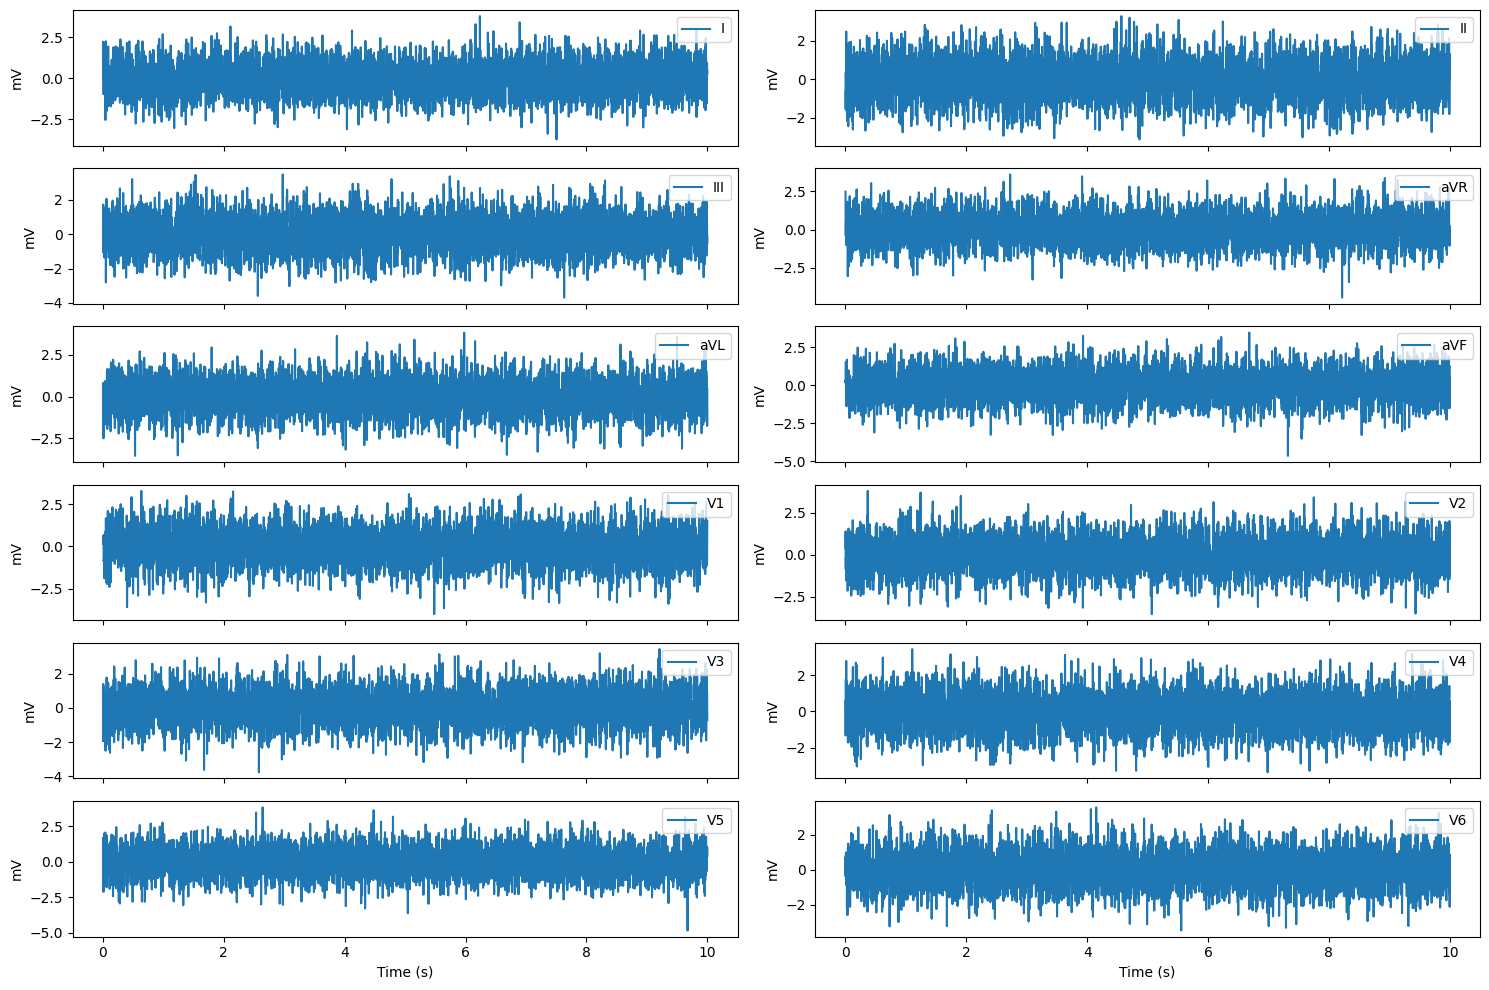

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_ecg_6x2(ecg_data, fs=500, duration=10):
    """
    Plot a 12-lead ECG in a 6x2 grid.
    
    Parameters:
    ecg_data (numpy array): ECG data of shape (12, 5000)
    fs (int): Sampling frequency in Hz
    duration (int): Duration of the ECG signal in seconds
    """
    leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    time = np.linspace(0, duration, ecg_data.shape[1])

    fig, axes = plt.subplots(6, 2, figsize=(15, 10), sharex=True)
    axes = axes.flatten()

    for i in range(12):
        axes[i].plot(time, ecg_data[i], label=leads[i])
        axes[i].legend(loc='upper right')
        axes[i].set_ylabel('mV')

    axes[-2].set_xlabel('Time (s)')
    axes[-1].set_xlabel('Time (s)')

    plt.tight_layout()
    plt.show()

# Generate synthetic ECG data for demonstration (replace this with actual data)
np.random.seed(0)
ecg_data = np.random.randn(12, 5000)

plot_ecg_6x2(ecg_data)


In [1]:
import torch

In [7]:
data = torch.load("/mnt/data2/ECG_CMR/test_data_dict_v8_toy_toy.pt")

In [84]:
data_gen = torch.load('/mnt/data2/dingzhengyao/work/checkpoint/ECG_CMR/diffusion/experiments/generate_cmr_data/test_data_dict_v8_toy_toy_gen.pt')

In [76]:
print(data.keys())
print(data_gen.keys())

dict_keys(['test_ecg_data', 'test_cmr_data', 'test_eid', 'test_cha_data', 'test_snp_data', 'test_tar_data', 'test_I21_data', 'test_I42_data', 'test_I48_data', 'test_I50_data', 'test_select_tar_data'])
dict_keys(['cmr', 'ecg'])


In [85]:
print(data['test_ecg_data'].shape)
print(data_gen['ecg'].shape)
print(data_gen['cmr'].shape)

torch.Size([10, 12, 5000])
(10, 12, 5000)
(10, 50, 256, 256)


In [15]:
ecg = data['test_ecg_data'][1,:,:]

In [19]:
print(ecg.shape)

torch.Size([12, 5000])


In [17]:
import os
import sys
sys.path.insert(0, '/home/dingzhengyao/Work/T2Vdiff/VGen')
from utils import augmentations, transformations
import torchvision.transforms as transforms
ecg_transform = transforms.Compose([
            transformations.MinMaxScaling(lower=-1, upper=1, mode="channel_wise"),
        ])
ecg = ecg_transform(ecg)

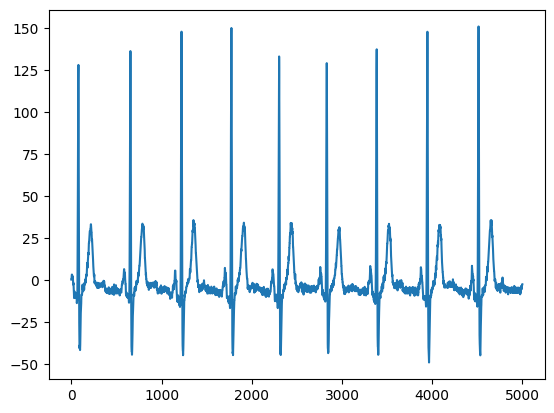

In [83]:
import matplotlib.pyplot as plt
plt.plot(data['test_ecg_data'][3,0,:])

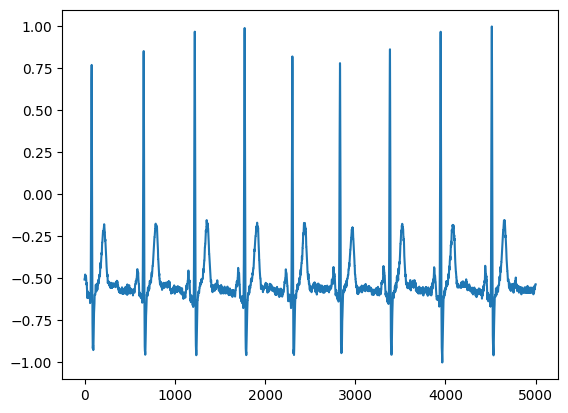

In [86]:
plt.plot(data_gen['ecg'][3,0,:])

In [6]:
data_toy={}
for key in data.keys():
    data_toy[key]=data[key][0:10]
torch.save(data_toy,"/mnt/data2/ECG_CMR/test_data_dict_v8_toy_toy.pt")

In [43]:
import numpy as np
import torch

# 给定的张量列表
tensor_list = [torch.tensor([4, 7]), torch.tensor([3, 0]), torch.tensor([6]), torch.tensor([1, 5]), torch.tensor([9, 8]), torch.tensor([2])]

# 将每个张量转换为NumPy数组并合并
merged_array = np.concatenate([tensor.numpy() for tensor in tensor_list])

print("Merged array:", merged_array)


Merged array: [4 7 3 0 6 1 5 9 8 2]


In [44]:
import pickle
with open('/home/dingzhengyao/Work/T2Vdiff/VGen/list.pkl', 'rb') as file:
    my_list = pickle.load(file)


In [67]:
all_data = my_list
# print(f'all_data[0]:{all_data[0]}')
# print(f'all_data,lenth:{len(all_data)}')
merged_data = {key: [] for key in all_data[0][0][1].keys()}
print(f'merged_data:{merged_data.keys()}')
merged_indices = []

# 遍历收集到的每个进程的数据
for sub_data in all_data:
    for index, sub_data_dict in sub_data:
        merged_indices.append(index)
        for key, value in sub_data_dict.items():
            merged_data[key].append(value)

merged_indices = np.concatenate([tensor.numpy() for tensor in merged_indices])
for key, value in merged_data.items():
    if key == 'cmr':
        reshaped_arrays = []
        for arr in value:
            if arr.ndim != 4:
                reshaped_arrays.append(arr[np.newaxis, :])
            else:
                reshaped_arrays.append(arr)
        merged_data[key] = np.concatenate(reshaped_arrays, axis=0)
    else:
        reshaped_arrays = []
        for arr in value:
            if arr.ndim != 3:
                reshaped_arrays.append(arr[np.newaxis, :])
            else:
                reshaped_arrays.append(arr)
        merged_data[key] = np.concatenate(reshaped_arrays, axis=0)
# 打印 merged_indices 内容进行调试
print("merged_indices:", merged_indices)
print(merged_data['cmr'].shape)
# 将每个 key 对应的列表合并为单个 ndarray，并按照原始索引排序
sorted_indices = np.argsort(merged_indices)
for key in merged_data.keys():
    merged_data[key] = np.array([merged_data[key][i] for i in sorted_indices])
print(merged_data['cmr'].shape)
print(merged_data['ecg'].shape)

merged_data:dict_keys(['cmr', 'ecg'])
merged_indices: [4 7 3 0 6 1 5 9 8 2]
(10, 50, 256, 256)
(10, 50, 256, 256)
(10, 12, 5000)


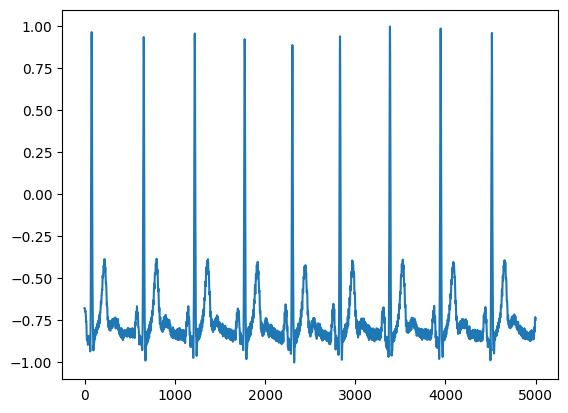

In [74]:
plt.plot(merged_data['ecg'][3][1])

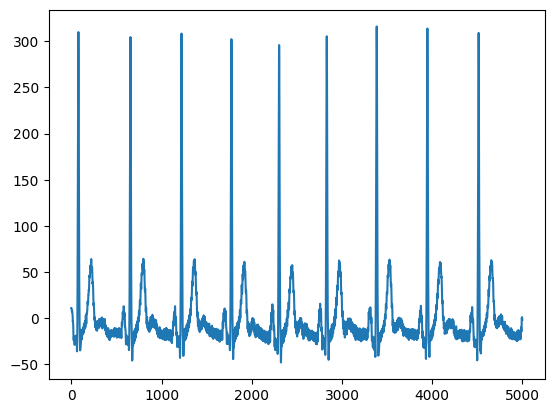

In [73]:
import matplotlib.pyplot as plt
plt.plot(data['test_ecg_data'][3,1,:])